<a href="https://colab.research.google.com/github/Delvinah/Phase_3_project./blob/main/SyriaTel_Customer_Churn%20(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Business Oveview**

Customer churn refers to the loss of customers over a specific period, and it is a critical metric for any business. By understanding churn patterns, the company can take proactive measures to retain valuable customers, improve customer satisfaction, and ultimately increase revenue.


**Problem statement**

Telecom customer churn is a critical issue that can lead to significant revenue loss for service provider institutions. Understanding why customers leave the telecom service provider and predicting which customers are at risk of churning enables the telecom service provider to take proactive measures to retain customers. In this project I aim to predict customer churn using a machine learning model.


**Objectives.**

**Main objective.**

Develop a machine learning model to predict customer churn.

**Specific Objectives.**

1. Conduct Exploratory Data Analysis (EDA) to understand the distribution and relationships of various features and identify patterns associated with customer churn.

2. Achieve high accuracy and recall to minimize false negatives (missed churners).
3. Provide actionable insights for stakeholders to reduce churn rates.


The project will:

Analyze historical customer data to identify patterns and trends related to churn.
Use statistical and machine learning models to predict the likelihood of churn.
Offer actionable insights into the key drivers of churn and recommend strategies for reducing churn.

**Data overview**

**Data Description:** The dataset contains 3333 rows and 21 columns, including demographic data, usage statistics, service plans, and the churn target variable.

**Data processing**

In [1]:
# Importing libraries
# Data manipulation
import pandas as pd
import numpy as np
# Data visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Modeling
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Data loading
df = pd.read_csv('/content/bigml_59c28831336c6604c800002a (1).csv')

In [3]:
#summary of our data
def data_summary(df):
    print("---- DataFrame Info ----")
    df.info()

    print("\n---- DataFrame Shape ----")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

    print("\n---- DataFrame Description ----")
    print(df.describe())
data_summary(df)

---- DataFrame Info ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night cal

In [4]:
# List numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

# List categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)

Numeric Columns: ['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']
Categorical Columns: ['state', 'phone number', 'international plan', 'voice mail plan']


**Numeric Columns:**

**account length:** The number of days or months a customer has been subscribed to the service.

**area code:** A numeric code representing the geographical area where the customer's phone is registered.

**number vmail messages:** The count of voice mail messages stored in the customer's account.

**total day minutes:** The total number of minutes the customer used during the day.

**total day calls:** The total number of calls made during the day.

**total day charge:** The total cost of calls made during the day.

**total eve minutes:** The total number of minutes the customer used during the evening.

**total eve calls:** The total number of calls made during the evening.

**total eve charge:** The total cost of calls made during the evening.

**total night minutes:** The total number of minutes the customer used during the night.

**total night calls:** The total number of calls made during the night.

**total night charge:** The total cost of calls made during the night.

**total intl minutes:** The total number of international minutes used by the customer.

**total intl calls:** The total number of international calls made by the customer.

**total intl charge:** The total cost of international calls.

**customer service calls:** The total number of times the customer called customer service.


**Categorical Columns:**

**state:** The state where the customer resides.

**phone number:** The customer’s unique phone number.

**international plan:** Indicates whether the customer has subscribed to an international call plan (e.g., "Yes" or "No").

**voice mail plan:** Indicates whether the customer has subscribed to a voicemail plan (e.g., "Yes" or "No").

# **Data Preparation**

Data preparation involves cleaning, transforming, and organizing the dataset to ensure accuracy and suitability for analysis.

# Data cleaning

In [5]:
def missing_values_check(df):

  print("checking if there's any missing values")
  print(df.isnull().any())
  #checking for the sum of missing values
  print('sum of missing values')
  print(df.isnull().sum().sum())
missing_values_check(df)

checking if there's any missing values
state                     False
account length            False
area code                 False
phone number              False
international plan        False
voice mail plan           False
number vmail messages     False
total day minutes         False
total day calls           False
total day charge          False
total eve minutes         False
total eve calls           False
total eve charge          False
total night minutes       False
total night calls         False
total night charge        False
total intl minutes        False
total intl calls          False
total intl charge         False
customer service calls    False
churn                     False
dtype: bool
sum of missing values
0


This dataframe has no missing values.

In [6]:
# Function for checking duplicates
def duplicates_check(df):
  print(df.duplicated().any())

duplicates_check(df)

False


This dataframe got no duplicates

In [7]:
# Converting the 'area code' column to object datatype
df['area code'] = df['area code'].astype('object')


In [8]:
# Dropping the 'phone number' column
df = df.drop("phone number", axis=1)

The phone number is a unique identifier and does not contribute to the analysis or prediction. It does not provide insights into customer behavior, usage patterns, or business outcomes.

# Exploratory data analysis

Let's do some statistical data analysis to get a better understandng of our data through visualizations.

  # Univariate analysis
  Univariate analysis involves examining a single variable, such as customer churn, to understand its distribution and key characteristics, such as the proportion of customers who have churned (True) versus those who have not (False).

***categorical data***

churn
False    2850
True      483
Name: count, dtype: int64


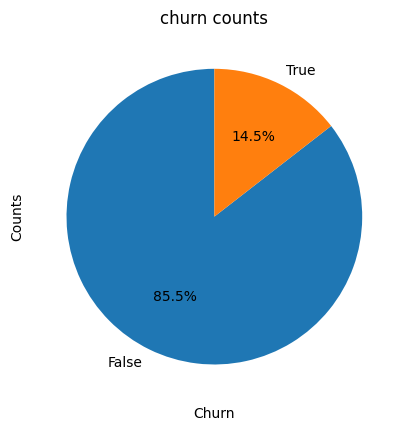

In [9]:
counts = df['churn'].value_counts()
print(counts)
counts.index = counts.index.astype(str)
plt.pie(counts, labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
plt.title('churn counts')
plt.xlabel('Churn')
plt.ylabel('Counts')

plt.show()

Out of 3333 customers in our dataset 483 customers have churned which is represented by 14.5%.

international plan
no     3010
yes     323
Name: count, dtype: int64


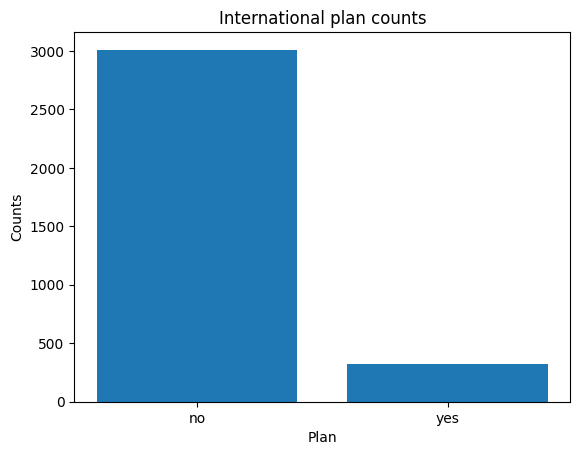

In [10]:
# Visalizing customers with international plan
counts = df['international plan'].value_counts()
print(counts)
plt.bar(counts.index, counts.values)
plt.title('International plan counts')
plt.xlabel('Plan')
plt.ylabel('Counts')

plt.show()

Out of 3333 customer in our dataset only 323 have subscribe to an international plan

area code
415    1655
510     840
408     838
Name: count, dtype: int64


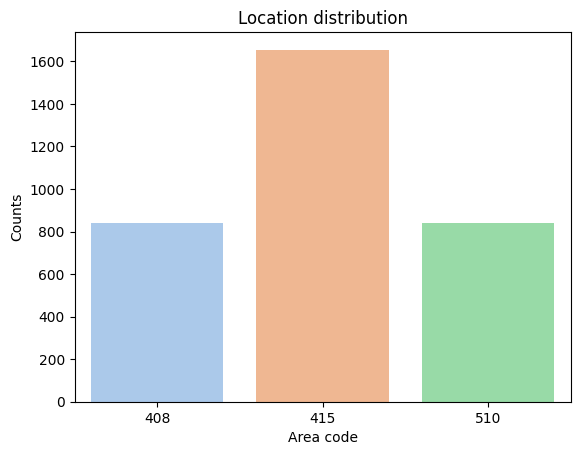

In [11]:
# checking the distribution of the customers according to their location
area_counts = df['area code'].value_counts()
print(area_counts)
sns.countplot(x='area code', data=df, palette='pastel')
plt.title('Location distribution')
plt.xlabel('Area code')
plt.ylabel('Counts')

plt.show()

Most of the customers come from area code 415, followed by area code 510 then area code 408.

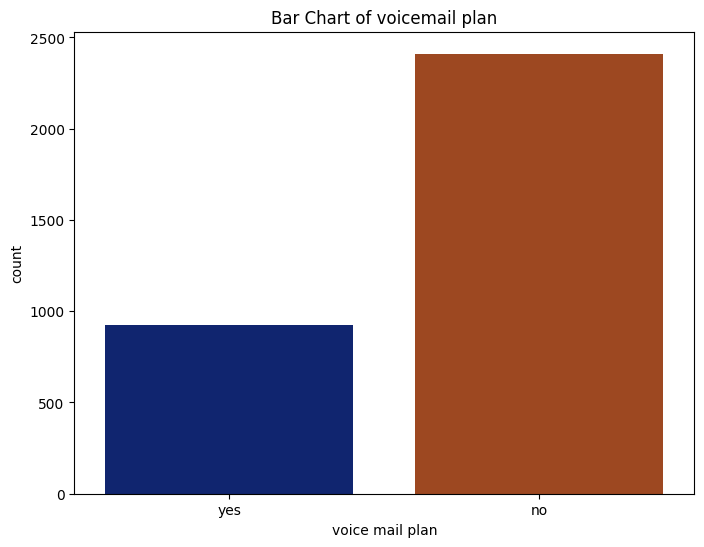

In [12]:
# checking for distribution of customers with voice mail plan
plt.figure(figsize=(8,6))
sns.countplot(x='voice mail plan', data=df, palette='dark')
plt.title('Bar Chart of voicemail plan')
plt.show()


Most of the customers don't have a voice mail plan.

***Numerical data***

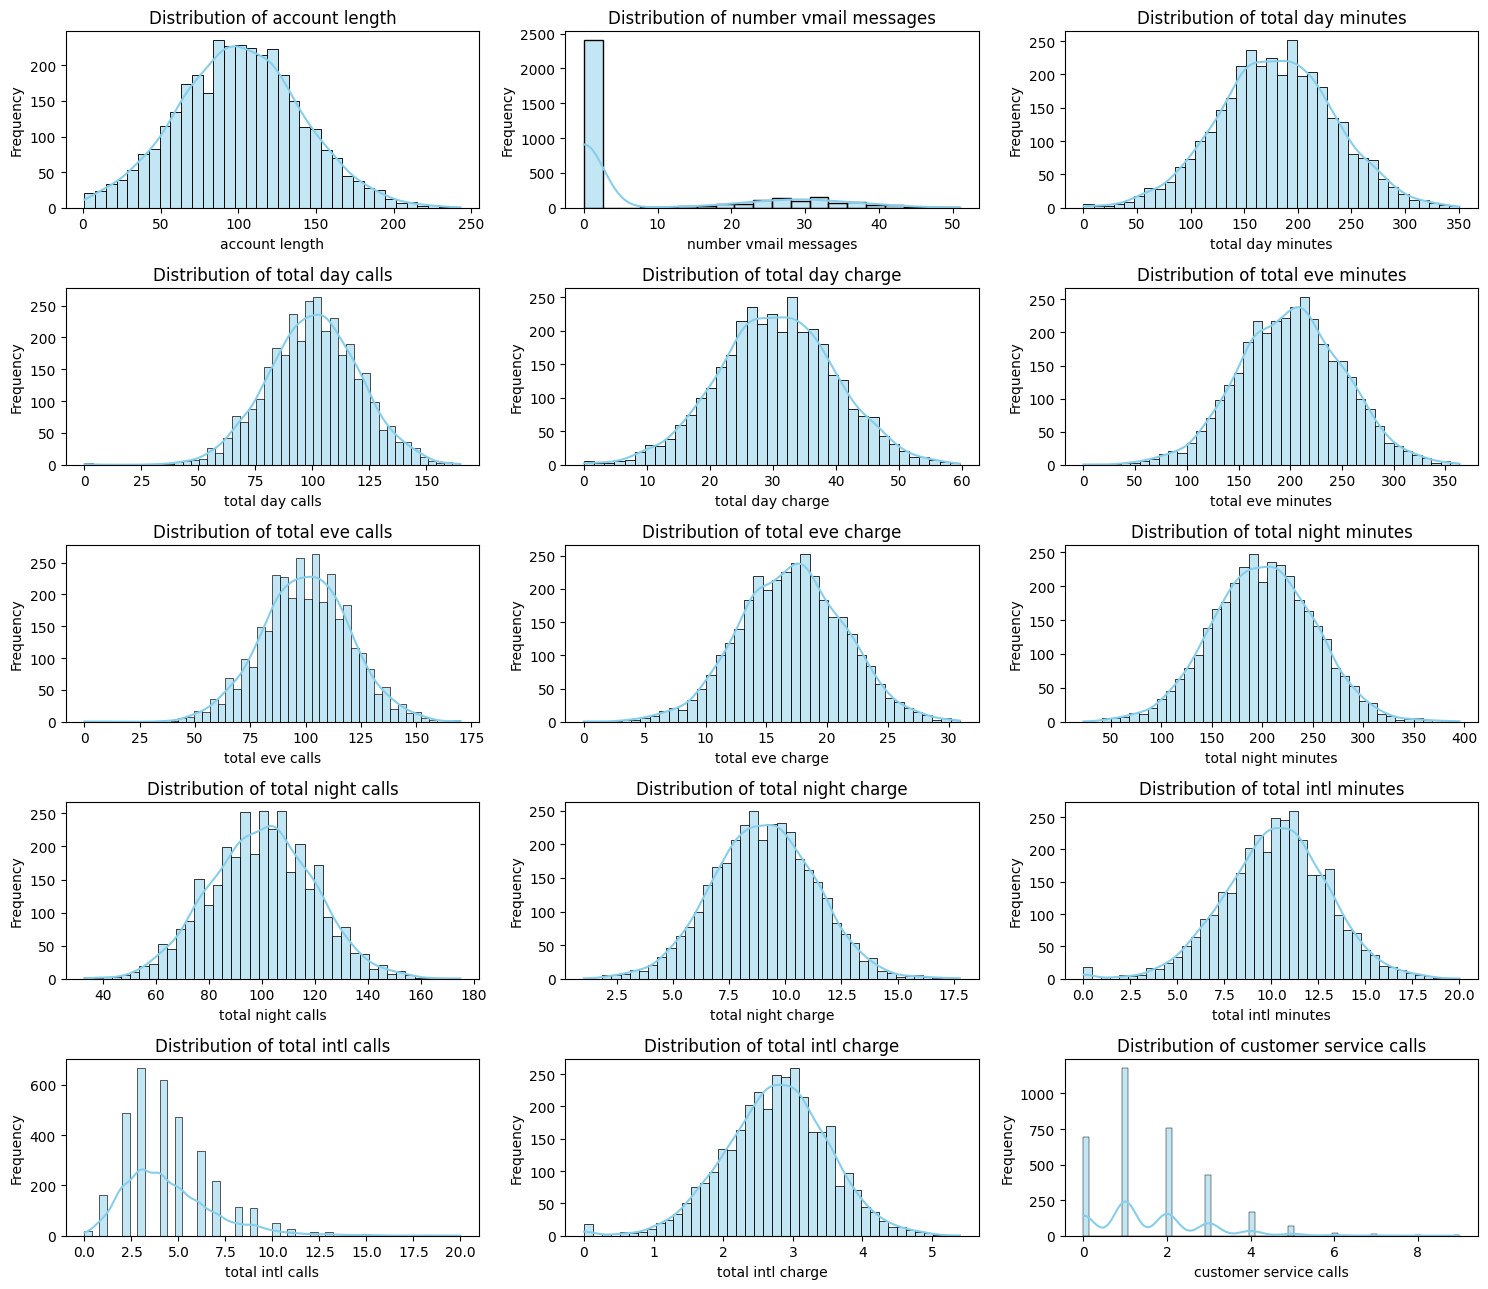

In [13]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Create subplots
n_cols = min(3, len(numeric_columns)) # Number of columns in the subplot grid
n_rows = int(np.ceil(len(numeric_columns) / n_cols))  # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 13))
axes = axes.flatten()  # Flatten the axes for easy iteration

# Plot each numeric column
for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')  # Histogram with density plot
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots
for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


**Customer Behavior Consistency:** Most features, including total minutes, calls, and charges across various time periods (day, evening, and night), exhibit normal or symmetric distributions. This indicates consistent usage patterns among customers.

**Voicemail Usage:** Voicemail usage is notably sparse, with a significant number of customers not utilizing this service at all.

**Proportional Relationships:** The charges are directly proportional to the usage minutes across all categories, reflecting the billing structure of the service.

# Bivariate Analysis

Bivariate analysis is the statistical analysis of two variables to determine if there is a relationship between them. It involves examining how changes in one variable correspond to changes in another, helping to identify correlations, trends, or patterns. This analysis can be done using various methods such as correlation, regression, or comparing means.

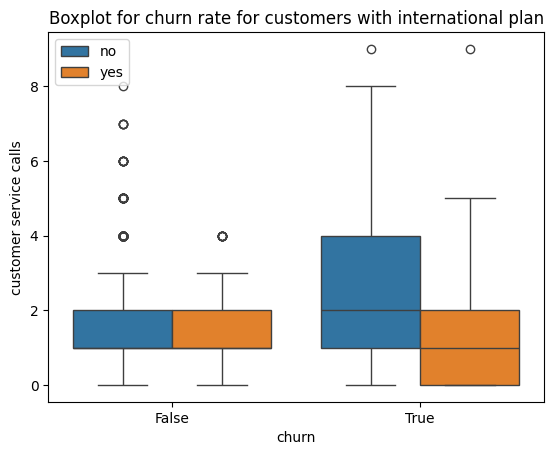

In [14]:
sns.boxplot(x=df['churn'], y=df['customer service calls'], hue=df['international plan'])

# Add labels and title
plt.title('Boxplot for churn rate for customers with international plan')

# Add a legend
plt.legend()

# Show the plot
plt.show()

most of the customers who churned did not have an international plan

In [15]:
def visualize_relationship(df, column, palette="muted"):
    plt.figure(figsize=(10, 4))
    churn_counts = df.groupby(column)["churn"].sum().sort_values(ascending=False)
    top_10_categories = churn_counts.head(10).index.tolist()
    sns.countplot(x= column, hue="churn", data=df, order=top_10_categories)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.show()



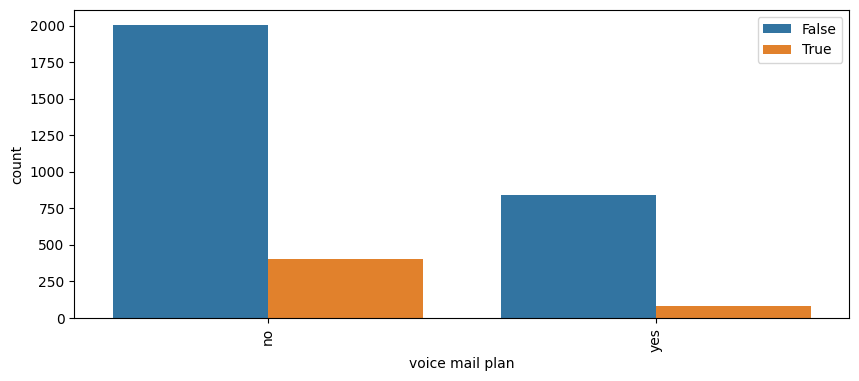

In [16]:
visualize_relationship(df, 'voice mail plan')

Mostt of the customers who churned did not have a voice mail plan.

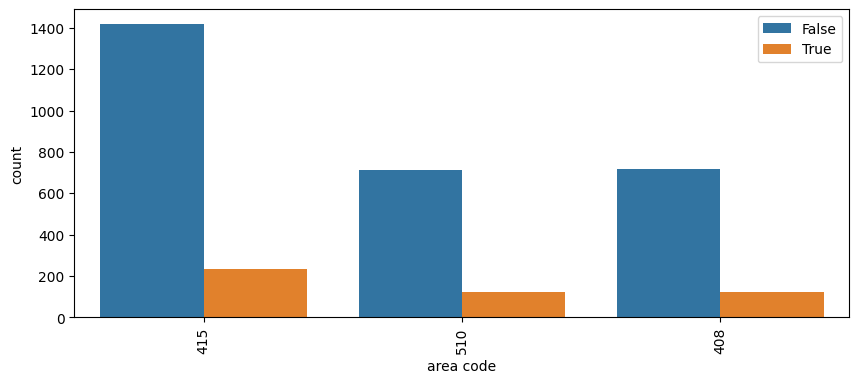

In [17]:
visualize_relationship(df, 'area code')

Most of the customers who churned are from area code 415

In [18]:
def plot_churn_hist(df, column, charge_type):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x= column, hue='churn', fill=True)
    plt.xlabel(f'Total {charge_type} Charge')
    plt.ylabel('Density')
    plt.title(f'Churn Distribution by {charge_type} Charges')
    plt.show()

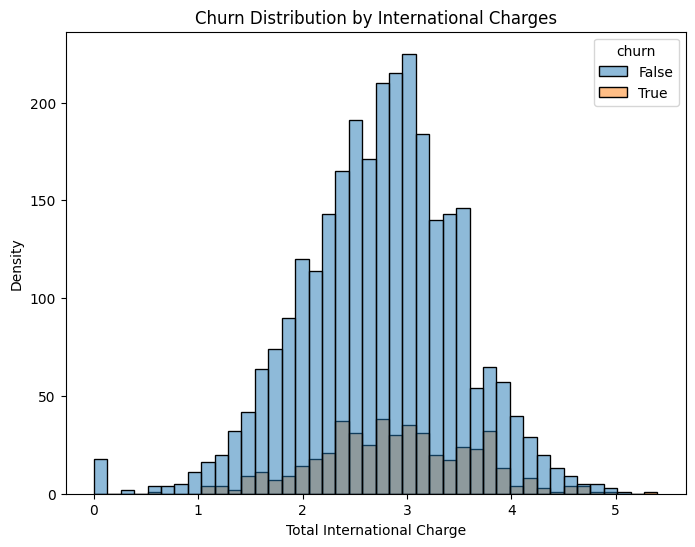

In [19]:
plot_churn_hist(df, 'total intl charge', 'International')

The distribution for both churned and non-churned customers appears unimodal and roughly symmetric.

There is no clear separation in the "Total International Charge" between customers who churned and those who did not, as their distributions largely overlap.

This suggests that "Total International Charge" alone may not be a strong predictor of churn.

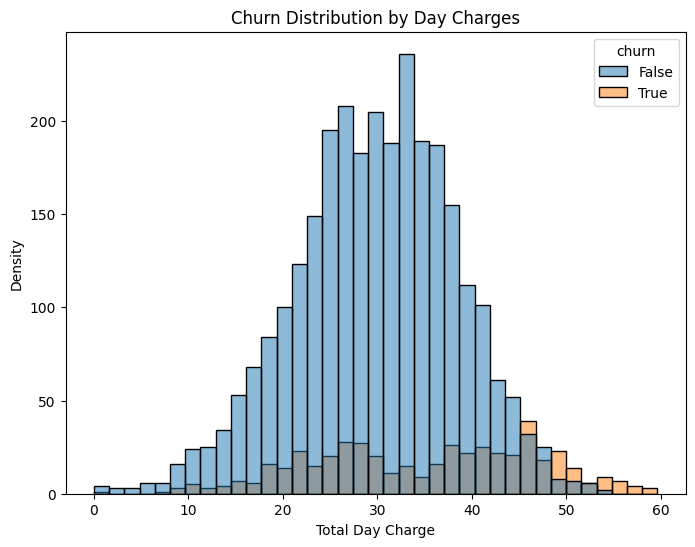

In [20]:
# Churn by day charges
plot_churn_hist(df, 'total day charge', 'Day')

The data is unimodal (one peak) and slightly skewed to the right, with most values concentrated around 30–40 on the x-axis.

 This graph shows that churned customers are slightly more likely to have higher total day charges compared to non-churned customers. This could indicate that customers with higher usage (and charges) might be more prone to churn.

# Dealing with outliers

In this dataset am using the z-score method to deal with outliers, this is beacause this methods for data that is normally distributed and most of or columns had data that was normally distributed.

In [21]:
from scipy import stats
import numpy as np

def drop_numerical_outliers(df, z_thresh=3):
    control = df.select_dtypes(include=[np.number]).apply(
        lambda x: np.abs(stats.zscore(x)) < z_thresh
    ).all(axis=1)
    return df[control]

df = drop_numerical_outliers(df, z_thresh=3)
print(df.shape)


(3169, 20)


# Checking for multicolinearity

Multicollinearity exists when two or more variables are strongly correlated, which can cause redundancy and affect the accuracy of predictive models.

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# create an empty dataframe
vif = pd.DataFrame()

# Selecting  numeric columns only
numeric_df = df.select_dtypes(include=['number'])

# copy all the features of X in vif dataframe
vif["features"] = numeric_df.columns

# calculate VIF for all the variables
vif["VIF Factor"] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]
vif

,features,VIF Factor
0,account length,7.300928e+00
1,number vmail messages,1.343586e+00
2,total day minutes,1.252914e+08
3,total day calls,2.264718e+01
4,total day charge,1.252959e+08
5,total eve minutes,3.735800e+07
6,total eve calls,2.275161e+01
7,total eve charge,3.735884e+07
8,total night minutes,1.073314e+07
9,total night calls,2.268968e+01


**High VIF Values:**

Variables like total day charge (1.24e+08), total eve charge (3.73e+07), total night charge (1.07e+07), and total intl charge (9.97e+05) have extremely high VIF values. This is expected because these are likely derived variables (charge = minutes * rate), and they are perfectly correlated with their respective minute-based variables.

**Moderate VIF Values:**

total eve minutes (3.73e+07) and total intl minutes (9.97e+05) show moderate VIFs, indicating possible correlations with other variables.

**Low VIF Values:**

Variables like number vmail messages, total intl calls, and customer service calls have relatively low VIFs (<5), indicating no significant multicollinearity.


In [51]:
def drop_high_vif(df, threshold=10):
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()  # Identify numeric columns

    while True:
        # Create a DataFrame to store VIF values for numeric columns
        vif = pd.DataFrame()
        vif["features"] = numeric_cols
        vif["VIF Factor"] = [variance_inflation_factor(df[numeric_cols].values, i) for i in range(len(numeric_cols))]

        # Find the maximum VIF value
        max_vif = vif["VIF Factor"].max()
        if max_vif < threshold:
            break  # Stop if all VIF values are below the threshold

        # Identify the feature to drop (highest VIF)
        feature_to_drop = vif.loc[vif["VIF Factor"].idxmax(), "features"]
        print(f"Dropping '{feature_to_drop}' with VIF: {max_vif}")

        # Drop the column from the original DataFrame
        df.drop(columns=[feature_to_drop], inplace=True)

        # Update the numeric columns list to exclude the dropped feature
        numeric_cols = [col for col in numeric_cols if col != feature_to_drop]

    return df, vif

cleaned_df, final_vif = drop_high_vif(df, threshold=10)
print(cleaned_df)
print(final_vif)


Dropping 'area code_408' with VIF: inf
Dropping 'international plan_no' with VIF: inf
Dropping 'voice mail plan_no' with VIF: inf
Dropping 'voice mail plan_yes' with VIF: 12.019417512605429
      state  account length  number vmail messages  total day minutes  \
0        16        0.687718               1.253323           1.575773   
1        35        0.155649               1.326937          -0.347037   
2        31        0.915748              -0.587032           1.172633   
3        35       -0.427092              -0.587032           2.212994   
4        36       -0.655122              -0.587032          -0.252290   
...     ...             ...                    ...                ...   
3328      3        2.309261               2.063079          -0.447357   
3329     49       -0.832478              -0.587032           0.944125   
3330     39       -1.845942              -0.587032           0.009658   
3331      6        2.106568              -0.587032           0.622728   
3332   

# Feature transformation
### OneHotEncoding


In [24]:
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total intl minutes,total intl calls,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,10.0,3,1,False
1,OH,107,415,no,yes,26,161.6,13.7,3,1,False
2,NJ,137,415,no,no,0,243.4,12.2,5,0,False
3,OH,84,408,yes,no,0,299.4,6.6,7,2,False
4,OK,75,415,yes,no,0,166.7,10.1,3,3,False


In [25]:
df = pd.get_dummies(df,columns = ['area code','international plan','voice mail plan'], dtype = int)
df.head()

,state,account length,number vmail messages,total day minutes,total intl minutes,total intl calls,customer service calls,churn,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,KS,128,25,265.1,10.0,3,1,False,0,1,0,1,0,0,1
1,OH,107,26,161.6,13.7,3,1,False,0,1,0,1,0,0,1
2,NJ,137,0,243.4,12.2,5,0,False,0,1,0,1,0,1,0
3,OH,84,0,299.4,6.6,7,2,False,1,0,0,0,1,1,0
4,OK,75,0,166.7,10.1,3,3,False,0,1,0,0,1,1,0


In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['state'] = label_encoder.fit_transform(df['state'])
df['churn'] = label_encoder.fit_transform(df['churn'])
df.head()
df.head()

,state,account length,number vmail messages,total day minutes,total intl minutes,total intl calls,customer service calls,churn,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,16,128,25,265.1,10.0,3,1,0,0,1,0,1,0,0,1
1,35,107,26,161.6,13.7,3,1,0,0,1,0,1,0,0,1
2,31,137,0,243.4,12.2,5,0,0,0,1,0,1,0,1,0
3,35,84,0,299.4,6.6,7,2,0,1,0,0,0,1,1,0
4,36,75,0,166.7,10.1,3,3,0,0,1,0,0,1,1,0


###Scaling data
Scaling data, also known as feature scaling or data normalization, is a data preparation technique that transforms the range of values in a dataset to a common scale. This is often done to put all features on the same scale, which can help improve the accuracy and efficiency of machine learning models.

In [27]:
scale = StandardScaler()

exclude_columns = ['churn', 'state']
# Function to scale columns
def scale_cols(column):
    return scale.fit_transform(df[column].values.reshape(-1, 1))

# Scale numeric columns except the excluded ones
for col in df.select_dtypes(include=[np.number]).columns:
    if col not in exclude_columns:
        df[col] = scale_cols(col)

df.head()

,state,account length,number vmail messages,total day minutes,total intl minutes,total intl calls,customer service calls,churn,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,16,0.687718,1.253323,1.575773,-0.116056,-0.634515,-0.422402,0,-0.577715,1.009831,-0.584517,0.328697,-0.328697,-1.630752,1.630752
1,35,0.155649,1.326937,-0.347037,1.272086,-0.634515,-0.422402,0,-0.577715,1.009831,-0.584517,0.328697,-0.328697,-1.630752,1.630752
2,31,0.915748,-0.587032,1.172633,0.709325,0.293179,-1.245137,0,-0.577715,1.009831,-0.584517,0.328697,-0.328697,0.613214,-0.613214
3,35,-0.427092,-0.587032,2.212994,-1.391647,1.220873,0.400334,0,1.730958,-0.990265,-0.584517,-3.042312,3.042312,0.613214,-0.613214
4,36,-0.655122,-0.587032,-0.252290,-0.078539,-0.634515,1.223069,0,-0.577715,1.009831,-0.584517,-3.042312,3.042312,0.613214,-0.613214


**Modeling**

Using the attributes in our dataset, we will develop a model in this phase that can forecast client churn. The recall score will be used to assess the model. In particular, it will be deemed successful if it receives a recall score of 80% or over.

The following algorithm will be employed in order to meet the goals outlined in the project proposal:


*   Logistic regression

Additionally, we will assess our models' performance using the ROC_AUC statistic.

SMOTE will be used to create artificial instances of the minority class in our dataset in order to address class imbalance.





In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3169 entries, 0 to 3332
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3169 non-null   int64  
 1   account length          3169 non-null   float64
 2   number vmail messages   3169 non-null   float64
 3   total day minutes       3169 non-null   float64
 4   total intl minutes      3169 non-null   float64
 5   total intl calls        3169 non-null   float64
 6   customer service calls  3169 non-null   float64
 7   churn                   3169 non-null   int64  
 8   area code_408           3169 non-null   float64
 9   area code_415           3169 non-null   float64
 10  area code_510           3169 non-null   float64
 11  international plan_no   3169 non-null   float64
 12  international plan_yes  3169 non-null   float64
 13  voice mail plan_no      3169 non-null   float64
 14  voice mail plan_yes     3169 non-null   float

In [29]:
# lets subset our features
x = df.drop('churn', axis  = 1)
y = df['churn']

In [30]:
# Splitting our dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

print(f"nx_train shape: {x_train.shape}")
print(f"nx_test shape: {x_test.shape}")
print(f"ny_train shape: {y_train.shape}")
print(f"ny_train shape: {y_test.shape}")
# printing the new dataset
x.head()

nx_train shape: (2535, 14)
nx_test shape: (634, 14)
ny_train shape: (2535,)
ny_train shape: (634,)


,state,account length,number vmail messages,total day minutes,total intl minutes,total intl calls,customer service calls,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,16,0.687718,1.253323,1.575773,-0.116056,-0.634515,-0.422402,-0.577715,1.009831,-0.584517,0.328697,-0.328697,-1.630752,1.630752
1,35,0.155649,1.326937,-0.347037,1.272086,-0.634515,-0.422402,-0.577715,1.009831,-0.584517,0.328697,-0.328697,-1.630752,1.630752
2,31,0.915748,-0.587032,1.172633,0.709325,0.293179,-1.245137,-0.577715,1.009831,-0.584517,0.328697,-0.328697,0.613214,-0.613214
3,35,-0.427092,-0.587032,2.212994,-1.391647,1.220873,0.400334,1.730958,-0.990265,-0.584517,-3.042312,3.042312,0.613214,-0.613214
4,36,-0.655122,-0.587032,-0.252290,-0.078539,-0.634515,1.223069,-0.577715,1.009831,-0.584517,-3.042312,3.042312,0.613214,-0.613214


In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
# Initialize SMOTE
sm = SMOTE(random_state=42)

In [33]:
x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)

**Decision trees**

Decision trees are a versatile machine learning algorithm used for classification and regression, representing decisions and their possible outcomes in a tree-like structure.
### Untuned decision trees

In [34]:
from sklearn import tree
model_t = tree.DecisionTreeClassifier(random_state=42)

In [35]:
model_t.fit(x_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [36]:
model_t.score(x_train_resampled, y_train_resampled)

1.0

The untuned model score for training data is 1.0 which indicates overfitting of the training data by the model.

In [37]:
y_pred = model_t.predict(x_test)

In [38]:
model_t.score(x_test, y_test)

0.8706624605678234

**Logistic Regression**

Logistic regression is a statistical method used to model binary outcomes by estimating the probability of an event occurring.

In [39]:
model =LogisticRegression(C=1e5, solver='liblinear')
model.fit(x_train_resampled, y_train_resampled)

LogisticRegression(C=100000.0, solver='liblinear')

In [40]:
from sklearn.model_selection import cross_val_score
model_score = cross_val_score(model, x_train_resampled, y_train_resampled)
print(model_score)
print(model_score.mean())

[0.75940707 0.76054732 0.73287671 0.76255708 0.7739726 ]
0.7578721565319713


In [41]:
y_pred = model.predict(x_test)

In [42]:
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.76      0.84       536
           1       0.35      0.70      0.47        98

    accuracy                           0.75       634
   macro avg       0.64      0.73      0.65       634
weighted avg       0.84      0.75      0.78       634



The logistic regression model attained an acuracy of 75% and a recall score of 73%.

# Tuned Decision Trees

In [43]:
model_tuned = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

In [44]:
model_tuned.fit(x_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

In [45]:
model_tuned.score(x_train, y_train)

0.8903353057199211

In [46]:
y_pred = model_tuned.predict(x_test)

In [47]:
model_tuned.score(x_test, y_test)

0.8659305993690851

In [48]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("Recall:", recall)


Recall: 0.7755102040816326


This tuned model using max_depth of 5 and min_samples_split of ten gained  an accuracy of 89% on training data and 86% on test data and a recall score of 77.5%

# Best Hyperparameter tuned Decision Trees.

In [49]:
# Define and train a Decision Tree model with manual tuning
model_dt = tree.DecisionTreeClassifier(
    criterion='gini',         # Splitting criterion ('gini' or 'entropy')
    max_depth=5,              # Limit the depth of the tree
    min_samples_split=10,     # Minimum samples required to split an internal node
    min_samples_leaf=5,       # Minimum samples at a leaf node
    random_state=42           # For reproducibility
)

model_dt.fit(x_train_resampled, y_train_resampled)

# Predict and evaluate
y_pred = model_dt.predict(x_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, model_dt.predict_proba(x_test)[:, 1]))


              precision    recall  f1-score   support

           0       0.96      0.88      0.92       536
           1       0.55      0.80      0.65        98

    accuracy                           0.87       634
   macro avg       0.76      0.84      0.79       634
weighted avg       0.90      0.87      0.88       634

ROC-AUC Score: 0.8796927353030766


This hyperparameter decision trees tuned model got an accuracy score of 87%, recall score of 84%  and ROC-AUC Score of 87.969%

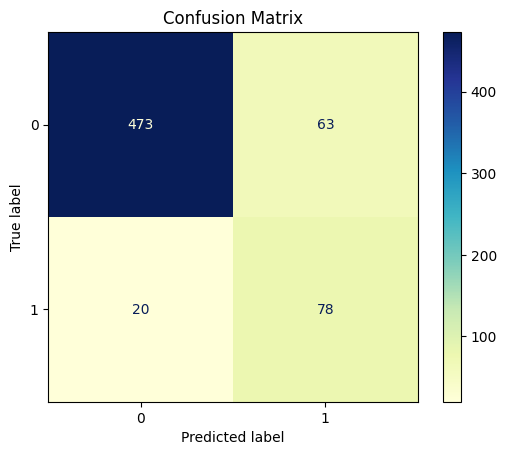

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.YlGnBu)
plt.title("Confusion Matrix")
plt.show()


True Negatives (TN): These are customers correctly predicted as not churning (473).

False Positives (FP): These are customers incorrectly predicted as churning when they actually did not (63).

False Negatives (FN): These are customers incorrectly predicted as not churning when they actually churned (20).

True Positives (TP): These are customers correctly predicted as churning (78).



**Recommendations.**

**Target High-Risk Customers:** Based on the model’s findings, prioritize retention efforts for customers with a high number of customer service calls. These customers may be facing issues with the service, and offering proactive support or incentives could help retain them.

**Review the International Plan:** Customers with an international plan showed a higher likelihood of churning. Consider offering tailored retention packages, such as discounts, additional features, or personalized customer support, to keep these customers engaged.

**Personalized Engagement:** Use the churn prediction model to segment customers based on their likelihood to churn. Develop targeted marketing campaigns and personalized offers to these high-risk segments, focusing on improving customer satisfaction and loyalty.

**Improve Customer Service Experience:** Since high customer service calls correlate with churn, addressing root causes of customer dissatisfaction (e.g., service reliability, billing issues) could help reduce churn rates. Implementing better self-service options or enhancing customer support may also alleviate frequent interactions.


**Conclusions**

Key elements that impact customer churn, like customer service encounters and the use of international plans, have been effectively identified by the churn prediction project. Particularly after hyperparameter tuning, the Decision Tree model had the highest efficacy in identifying these trends and accurately forecasting churn. The business can use this model to identify clients who are at risk and target them with customized retention measures. Even though the model works well in the current situation, its accuracy will need to be maintained through continuous data collecting and model retraining. To lower churn, enhance customer retention, and boost overall happiness, the business should take proactive measures by concentrating on the factors that have been identified as predictors of churn, such as high customer care calls and international plan usage.
